# Neural Networks - Identifying fashion shopping labels

## Convolutional Neural Network - good for image recognition

Based on Tech with Tim's video series

https://www.youtube.com/watch?v=wu9IH1Xvdd4&list=PLzMcBGfZo4-lak7tiFDec5_ZMItiIIfmj&index=2

Image classification dataset from

https://www.tensorflow.org/tutorials/keras/classification

T-shirts, sandals, dresses, etc...

In [1]:
# Import relevant libraries for neural network

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = keras.datasets.fashion_mnist

In [3]:
type(data)

module

# Splitting the data into test and training

In [4]:
# (x_train, y_train), (x_test, y_test)
# Automatic splitting of the data (10,000), no need to define here compared to traditional ML

(train_images, train_labels), (test_images, test_labels) = data.load_data()

# Exploring the data

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

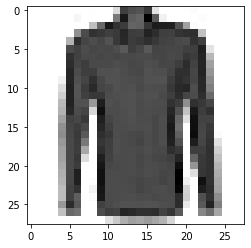

In [11]:
plt.imshow(train_images[40], cmap=plt.cm.binary)

In [8]:
# The labels don't really make sense?
train_labels[100]

8

# Check Tensorflow website for labels classification

| Label | Class   |
|------|------|
|   0  | T-shirt/top|
|   1  | Trouser|
|   2  | Pullover|
|   3  | Dress|
|   4  | Coat|
|   5  | Sandal|
|   6  | Shirt|
|   7  | Sneaker|
|   8  | Bag|
|   9  | Ankle boot|



In [12]:
# Create an index for the list to correlate to the index of the labels

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
type(train_images)

numpy.ndarray

In [15]:
# The range in values are large!

train_images[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  18,
        107, 119, 103,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 155,
        113,  61, 118, 173, 117,   0,   0,   3,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0, 110, 136,   0,
          0,   0,   0,   0, 167, 159,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   6,   0,  72, 147,   0,   0,
          5,   0,   2,   0,   0, 174, 118,   0,   5,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   1,   5,   0,   0, 174,   4,   0,   4,
          0,   0,   0,   0,   0,   0, 204,  44,   0,   4,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   8,   0, 125, 128,   0,   9,   0,
          0,   0,   0,   0,   2,   0, 107, 152,   0,   6,   0,   0,   0,
          0,   0],
       [  

# Normalisation

* This is done to shrink the data for better computation
* The image values are from 0 to 255

In [18]:
train_images = train_images/255.0
test_images = test_images/255.0

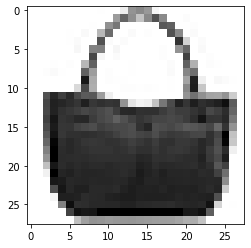

In [19]:
# The normalised data is still intact

plt.imshow(train_images[100], cmap=plt.cm.binary)

#  train_images[100] # Check if the normalisation worked

In [20]:
# What are the pixels dimensions

train_images[100].shape

(28, 28)

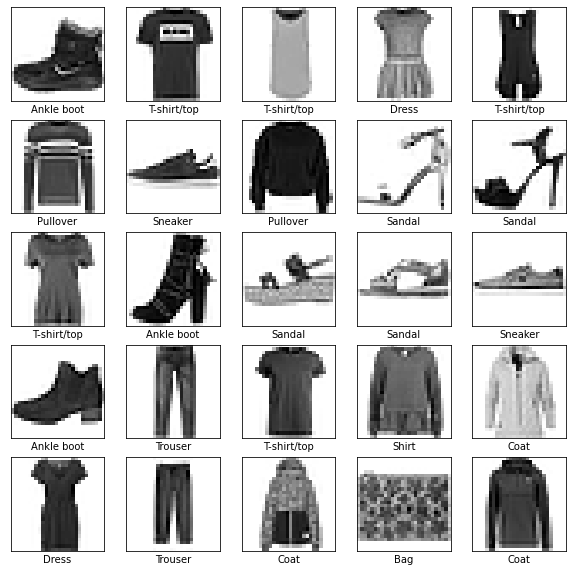

In [21]:
# Verify that the data is in the correct form

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Flattening the data

* As providing the current form of data in large arrays per image, it's not the best way for the neuron to handle it
* Need to flatten the data, 'squishing' it
* 28 rows and 28 columns into 784 points of data
* Instead of a nested array in each row to process, e.g. [[1,2,1...],[1,4,2,...],...] x 28 = BAD
* So we are going to have 784 neurons for the input layer
* And 10 neurons for the output data, as there are 10 labels

# Modelling

In [22]:
# Flatten - transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
# Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Flatten so that it is 'passable' to the neurons, also need to define the input shape!
    keras.layers.Dense(128, activation="relu"), # Add a dense layer/fully connected layer - to the hidden layers, activation function set as rectified linear unit
    keras.layers.Dense(10, activation="softmax") # Softmax as activation function, pick values for each neuron so all of those values add up to 1, probability of the network thinking its a certain value
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Compiling

In [23]:
# Look up more info on optimizers, not covered by Tim
# Optimiser - This is how the model is updated based on the data it sees and its loss function.
# Look up loss functions
# The ones below are very popular and have been used commonly
# Metrics define what the loss functions aims are
# Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy']) 

In [28]:
# Epochs define how many times the model will see this information
# E.g. how many times the model will see the same image
# This is because the order in which images come in will influence how parameters and biases are tweaked
# Usually done to increase the accuracy of the model at the expense of time
# However, sometimes changing it might not even increase the accuracy, so will need playing about, like hyperparameters

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 698us/step - loss: 0.4769 - accuracy: 0.8327
Epoch 2/5
1875/1875 [==============================] - 1s 720us/step - loss: 0.4623 - accuracy: 0.8367
Epoch 3/5
1875/1875 [==============================] - 1s 718us/step - loss: 0.4498 - accuracy: 0.8410
Epoch 4/5
1875/1875 [==============================] - 1s 724us/step - loss: 0.4403 - accuracy: 0.8452
Epoch 5/5
1875/1875 [==============================] - 1s 730us/step - loss: 0.4322 - accuracy: 0.8482


# Validating the model

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested Acc:", test_acc)

# Looks like the accuracy on test dataset is less than the training
# Represents overfitting - overfitted model memorises the noise and details in the training dataset

313/313 [==============================] - 0s 508us/step - loss: 0.4616 - accuracy: 0.8328
Tested Acc: 0.8327999711036682


In [30]:
predictions = model.predict(test_images)
print(predictions[0])

[4.4509716e-07 7.1037989e-09 3.9732568e-06 2.2428335e-06 4.1366702e-06
 1.4418633e-01 9.8616838e-06 3.2362032e-01 2.5333993e-03 5.2963930e-01]


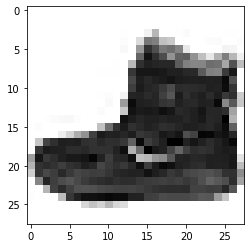

In [31]:
plt.imshow(train_images[0], cmap=plt.cm.binary)

In [32]:
# Get the largest value of the prediction
# Returns the index of the maximum values along an axis.

print(np.argmax(predictions[0]))

9


In [33]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


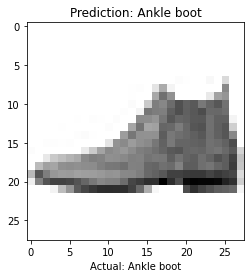

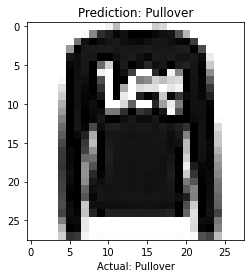

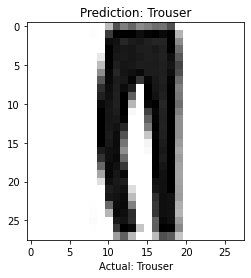

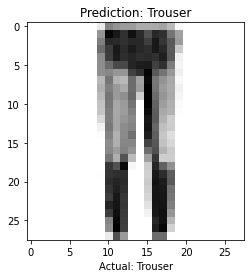

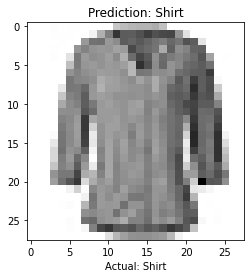

In [34]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[(test_labels[i])])
    plt.title("Prediction: " + class_names[np.argmax(predictions[i])])
    plt.show()


# Predicting specific images

In [38]:
# Function taken from tensorflow website

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

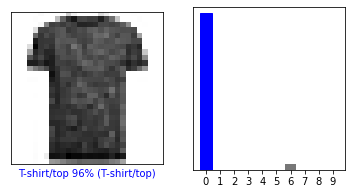

In [36]:
i = 125
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

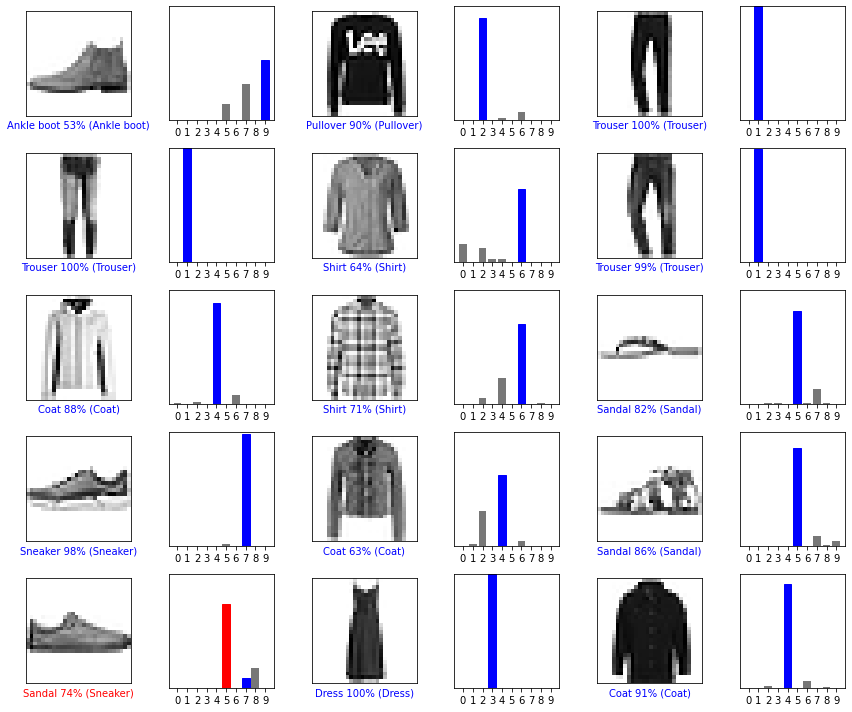

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Using the trained model

In [73]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [74]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [76]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.1581425e-04 9.6107185e-12 9.9603206e-01 3.0121776e-09 2.9122368e-03
  5.6339727e-10 8.3977031e-04 1.2123836e-14 2.7831535e-09 4.4619035e-12]]


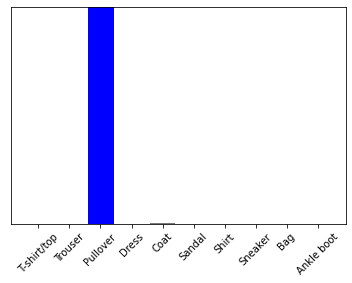

In [77]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [78]:
np.argmax(predictions_single[0])

2